In [1]:
from skimage.color import rgb2gray
import numpy as np
import cv2  # pip install opencv-python # pip install cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

(320, 320, 3)


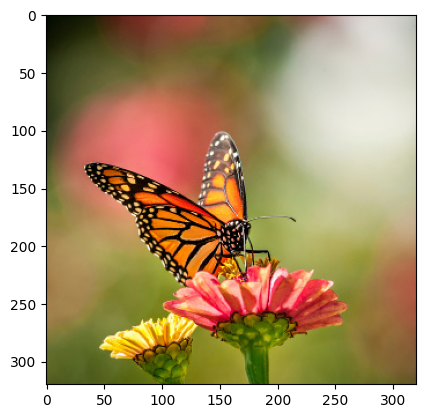

In [2]:
image = plt.imread('butterfly.jpg')
print(image.shape)
plt.imshow(image)

# Threshold based segmentation

In [3]:
def thres_seg(image):
  gray = rgb2gray(image)
  print(gray.shape)
  plt.figure() # To create new frame for the image to be displayed
  plt.imshow(gray, cmap='gray')
  gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
  gray_r [ gray_r > gray_r.mean() ] = 1
  gray_r [ gray_r <= gray_r.mean() ] = 0
  gray_r = gray_r.reshape(gray.shape[0],gray.shape[1])
  plt.figure()
  plt.imshow(gray_r, cmap='gray')

(320, 320)


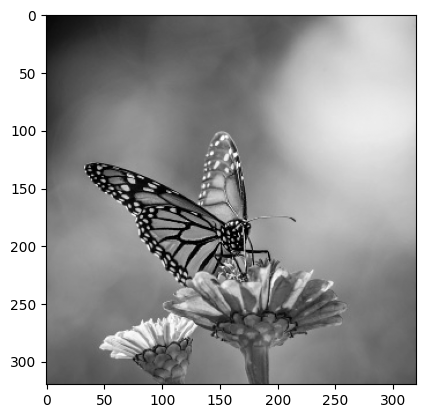

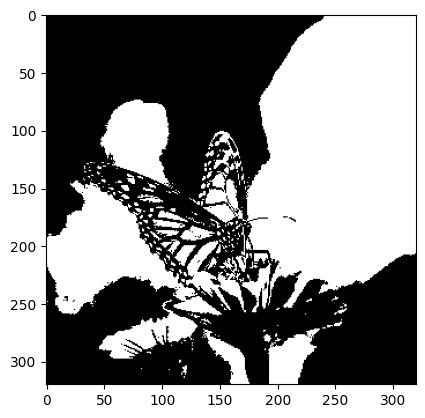

In [4]:
image = plt.imread('butterfly.jpg')
thres_seg(image)

### Lets try it on multiple images Thresholding

In [5]:
import cv2
import os

def load_images_from_folder(folder,ext=["jpg","bmp"]):
    images = []
    for filename in os.listdir(folder):
      file_ext = filename.split(".")
      if len(file_ext) ==2 and file_ext[1] in ext:
        print(filename)
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
          images.append(img)
    return images

In [6]:
all_jpg_images = load_images_from_folder(".")

lines.jpg
5.jpg
3.jpg
2.jpg
table.jpg
4.jpg
1.jpg
example.jpg
sample.jpg
butterfly.jpg


(279, 181)
(466, 505)
(456, 691)
(251, 667)
(225, 225)
(594, 383)
(467, 526)
(700, 1050)
(280, 520)
(320, 320)


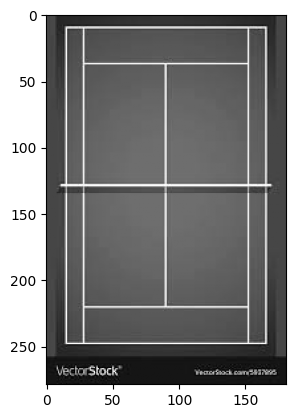

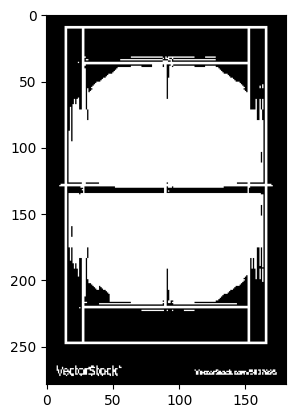

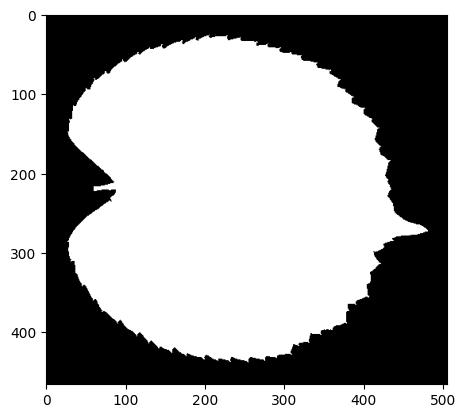

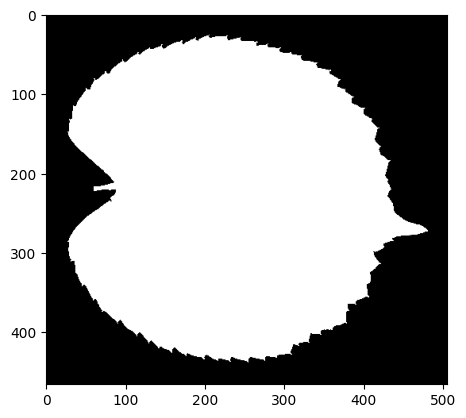

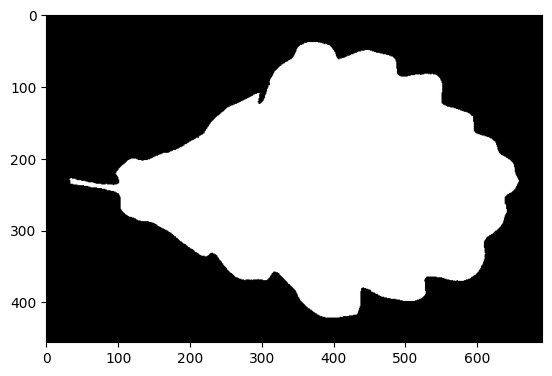

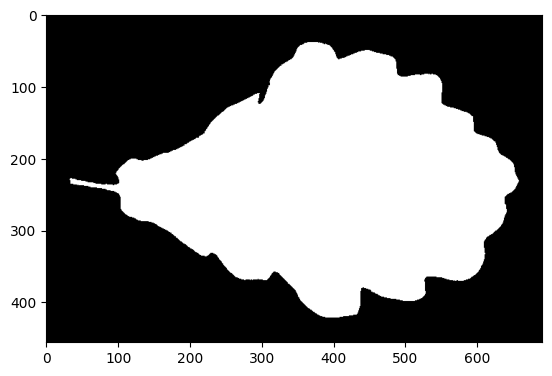

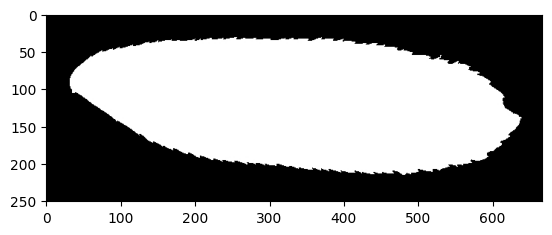

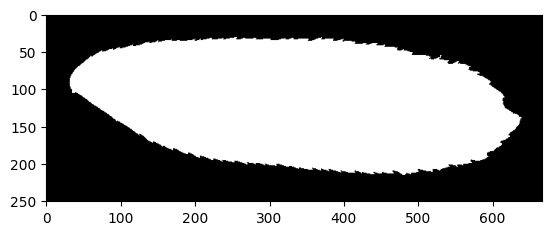

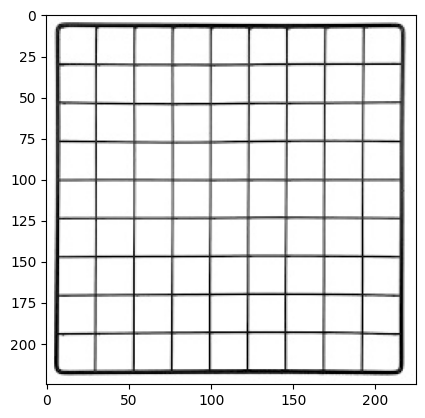

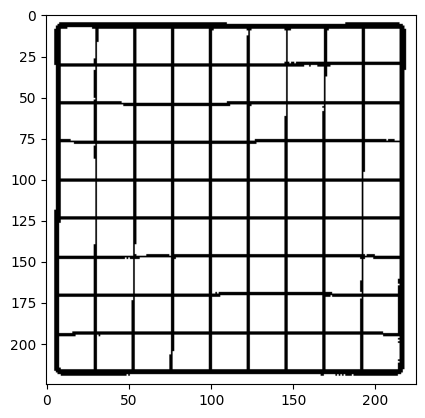

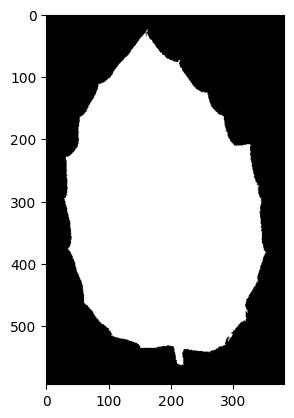

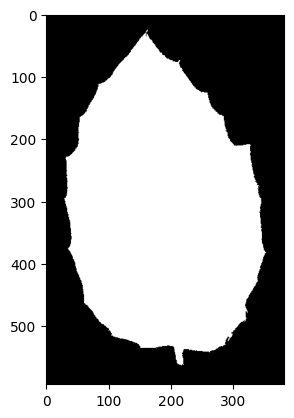

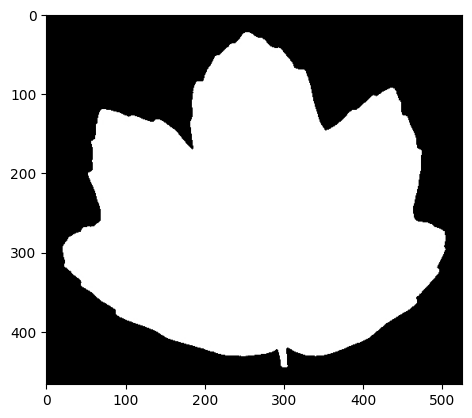

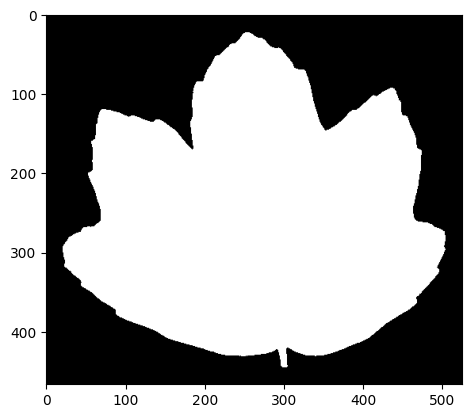

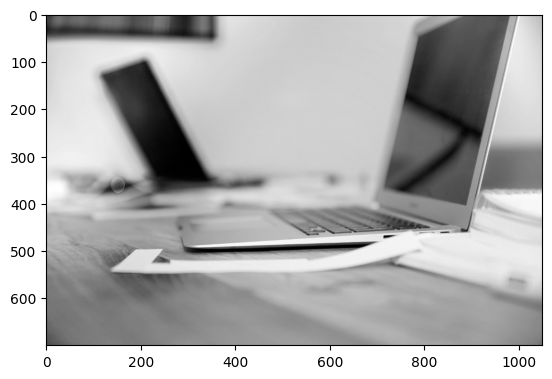

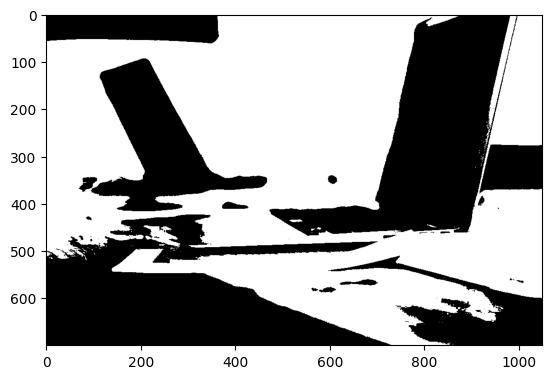

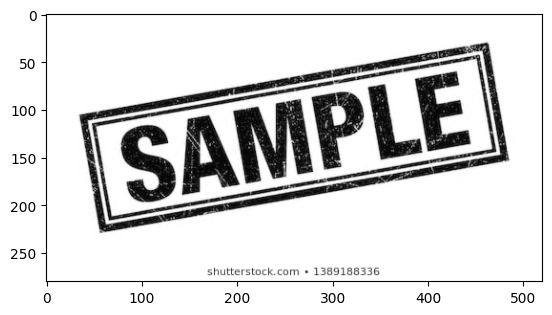

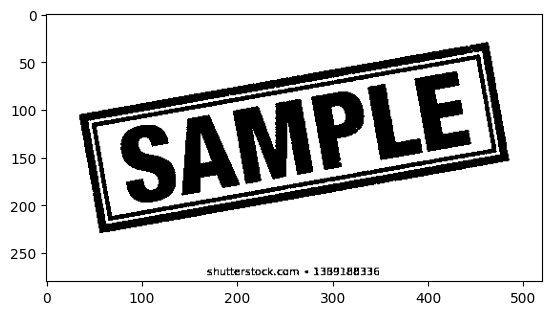

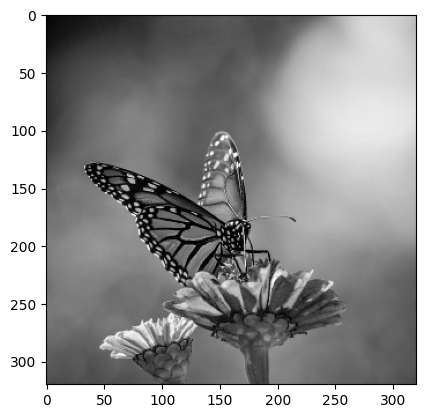

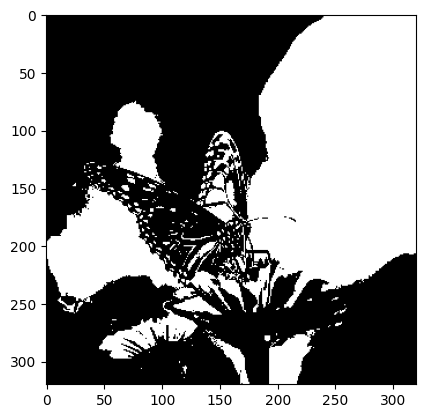

In [7]:
for image in all_jpg_images:
  thres_seg(image)

# Simple Convolution

+ Kernel: Should always be of odd_n * odd_n. It helps in finding precise mid point of the kernel
ex. 1 * 1 , 3 * 3, 5*5, 9*9, 11*11 .. etc

+ Kernel is also known as mask or feature detector

+ Padding --> types of padding / mode
https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html

# Use of Convolution Kernels
+ Edge detection
+ Horizontal Line Detection
+ Vertical Line Detection

In [8]:
def apply_kernel(image,kernel):
  gray = rgb2gray(image)
  out_img = ndimage.convolve(gray, kernel, mode='reflect')
  plt.figure()
  plt.imshow(out_img, cmap='gray')
  return out_img

In [9]:
def relu(input_arr):
  input_arr [ input_arr <= 0 ] = 0
  return input_arr

In [10]:
from scipy.special import expit # sigmoid function

In [17]:
def handle_shapes(image):
  # id = np.array([[0,0,0],[0,1,0],[0,0,0]])
  # apply_kernel(image,id)
  horz = np.array([[1,2,1],[0,0,0],[-1,-2,-1]]) # 3 by 3 kernel
  conv_out = apply_kernel(image,horz)
  # plt.figure()
  # plt.imshow(conv_out, cmap='gray')
  after_relu = relu(conv_out)
  plt.figure()
  # plt.imshow(after_relu, cmap='gray')
  # after_sigmoid = expit(conv_out)
  # plt.figure()
  # plt.imshow(after_sigmoid, cmap='gray')
  # vert = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
  # conv_out = apply_kernel(image,vert)


  # kernel_laplace = np.array([[1, 1, 1],[1, -8, 1],[1, 1, 1]])
  # conv_out = apply_kernel(image,kernel_laplace)

#   edge_detection3 = np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, -1]])
#   conv_out = apply_kernel(image,edge_detection3)
  plt.figure()
  plt.imshow(conv_out, cmap='gray')
  # edge_detection2 = np.array([[0, -1, 0],[-1, 4, -1],[0, -1, 0]])
  # apply_kernel(image,edge_detection2)
  # edge_detection1 = np.array([[1, 0, -1],[0, 0, -0],[-1, 0, 1]])
  # apply_kernel(image,edge_detection1)
  return None

lines.jpg
5.jpg
3.jpg
2.jpg
table.jpg
4.jpg
1.jpg
example.jpg
sample.jpg
butterfly.jpg


/tmp/ipython-input-17-1721615971.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


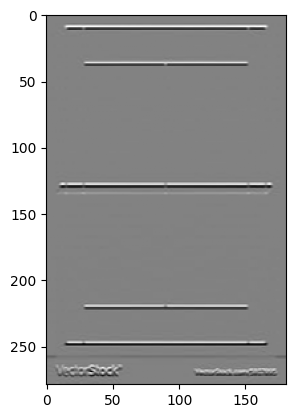

<Figure size 640x480 with 0 Axes>

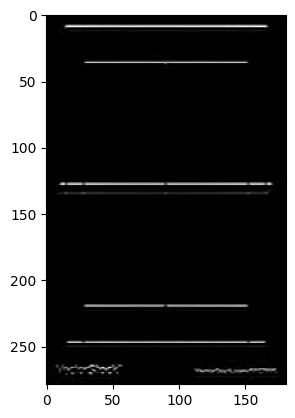

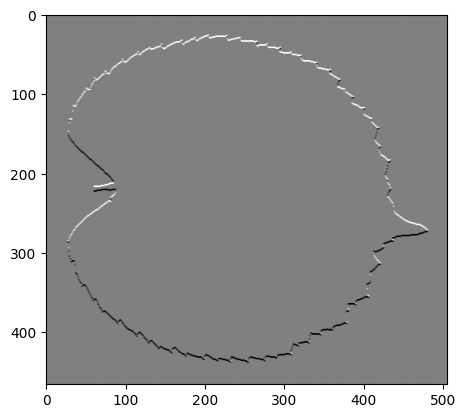

<Figure size 640x480 with 0 Axes>

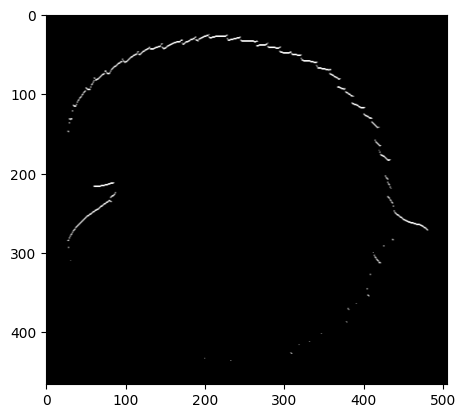

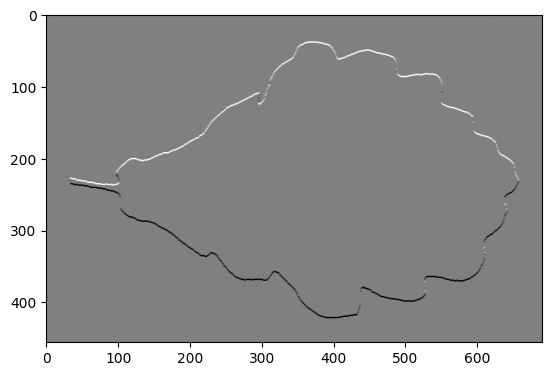

<Figure size 640x480 with 0 Axes>

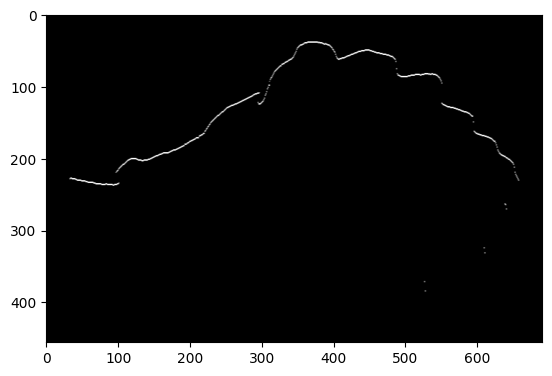

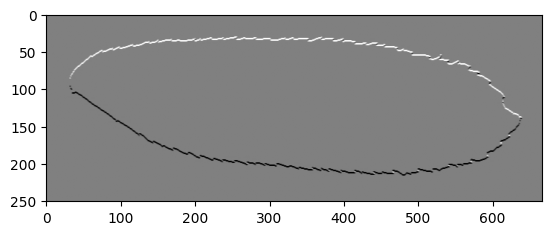

<Figure size 640x480 with 0 Axes>

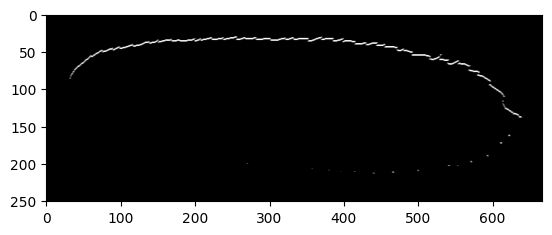

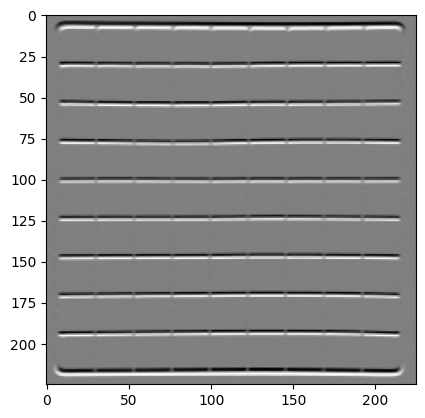

<Figure size 640x480 with 0 Axes>

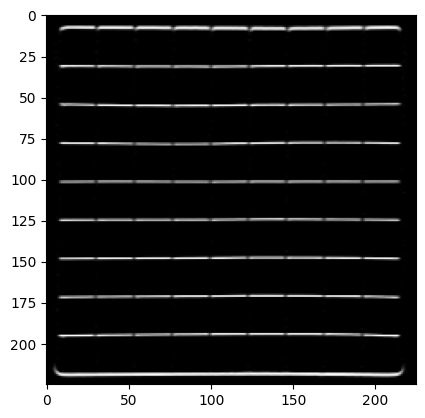

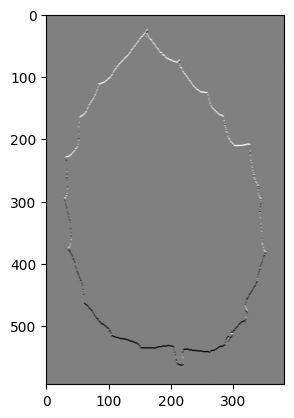

<Figure size 640x480 with 0 Axes>

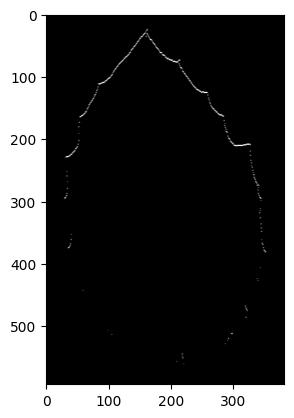

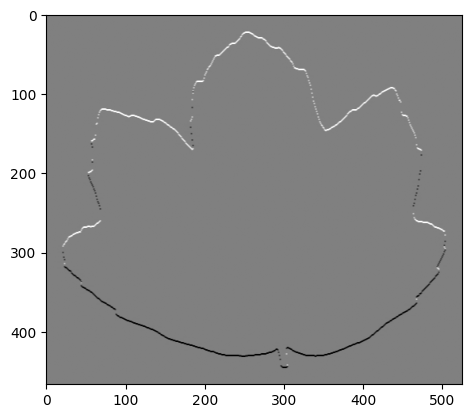

<Figure size 640x480 with 0 Axes>

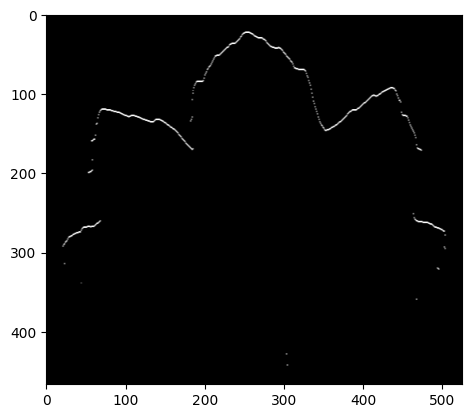

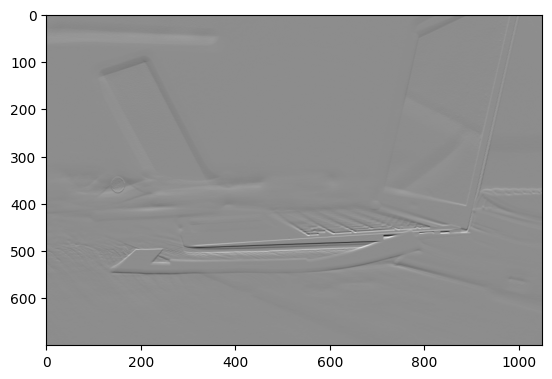

<Figure size 640x480 with 0 Axes>

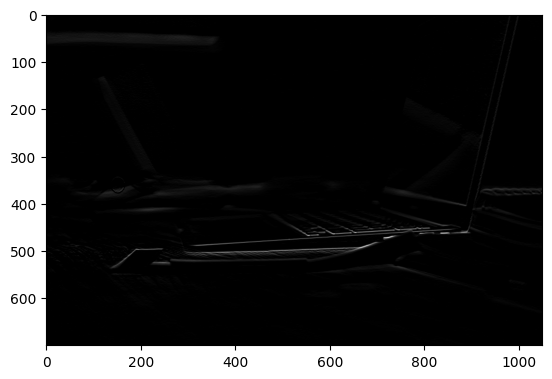

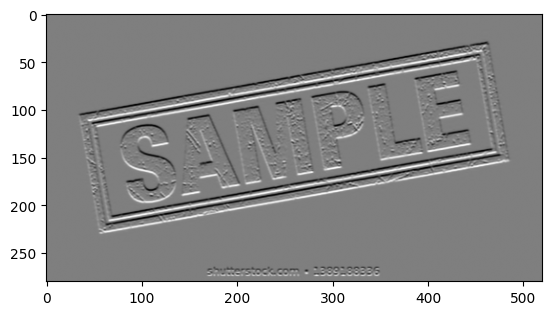

<Figure size 640x480 with 0 Axes>

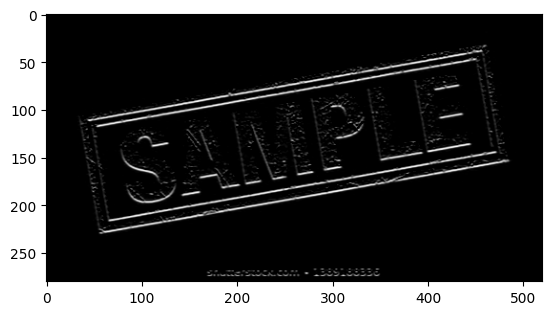

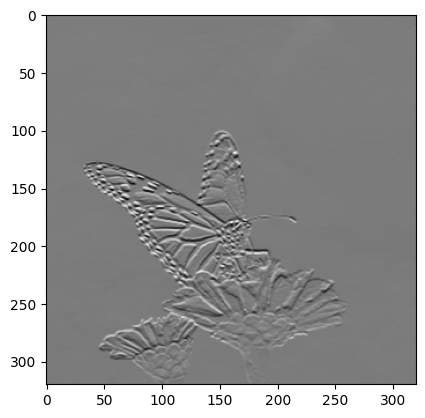

<Figure size 640x480 with 0 Axes>

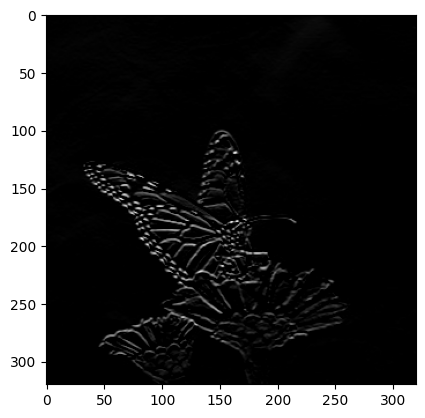

In [18]:
all_jpg_images = load_images_from_folder(".")
for image in all_jpg_images:
  handle_shapes(image)

# Clustering the Image parts

(320, 320, 3)


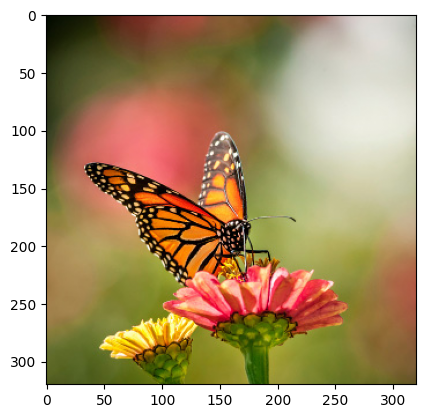

In [19]:
pic = plt.imread('butterfly.jpg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)

In [20]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(102400, 3)

In [21]:
pic_n[:5,:]

array([[0.00784314, 0.03529412, 0.00392157],
       [0.01176471, 0.03921569, 0.00784314],
       [0.01568627, 0.04313725, 0.01176471],
       [0.01960784, 0.05098039, 0.00784314],
       [0.02352941, 0.05490196, 0.01176471]])

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=7).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

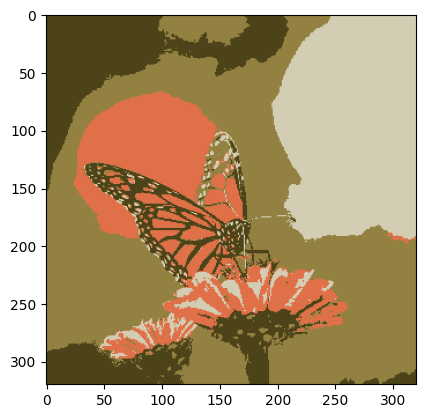

In [24]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)

# Masking

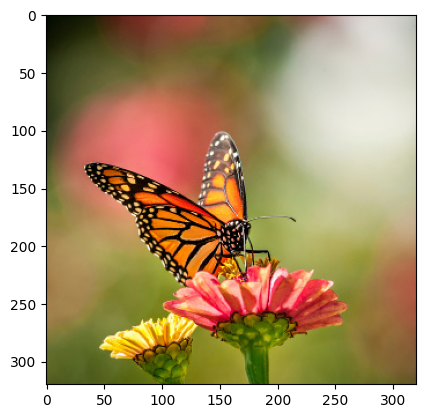

In [25]:
upstate = cv2.imread('butterfly.jpg')
plt.imshow(cv2.cvtColor(upstate,cv2.COLOR_RGB2BGR))

In [26]:
blue_min = np.array([10, 60, 60], np.uint8)
blue_max = np.array([255, 255, 255], np.uint8)

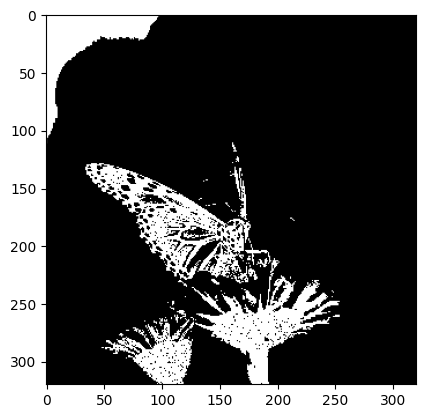

In [27]:
mask_inverse = cv2.inRange(upstate, blue_min, blue_max)
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

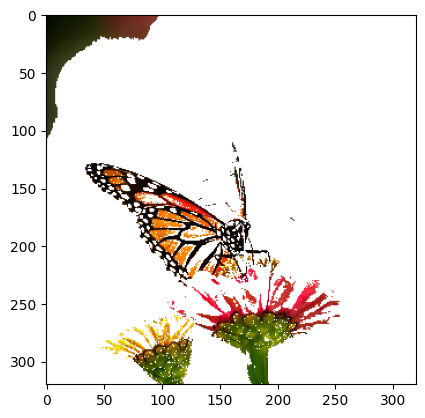

In [28]:
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

# perform bitwise and on mask to obtain cut-out image that is not blue
masked_upstate = cv2.bitwise_and(upstate, mask_rgb)

# replace the cut-out parts with white
masked_replace_white = cv2.addWeighted(masked_upstate, 1, \
                                       cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)

plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))

In [29]:
b  = cv2.imread('butterfly.jpg')
cups_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(b, (7,7), 0), cv2.COLOR_BGR2GRAY)

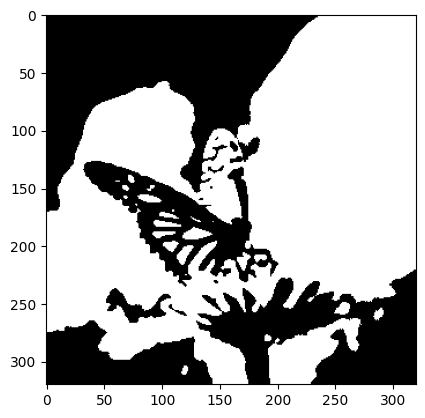

In [30]:
low_thresh = 120
high_thresh = 200
_, cups_thresh = cv2.threshold(cups_preprocessed, low_thresh, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(cups_thresh, cv2.COLOR_GRAY2RGB))

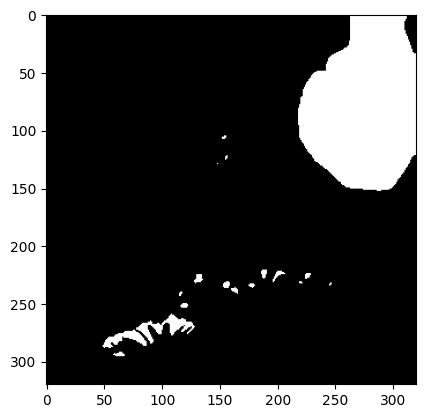

In [31]:
_, cups_thresh_hi = cv2.threshold(cups_preprocessed, high_thresh, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(cups_thresh_hi, cv2.COLOR_GRAY2RGB))

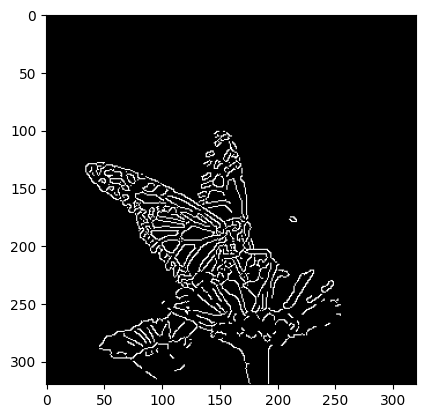

In [32]:
cups_edges = cv2.Canny(cups_preprocessed, threshold1=90, threshold2=110)
plt.imshow(cv2.cvtColor(cups_edges, cv2.COLOR_GRAY2RGB))

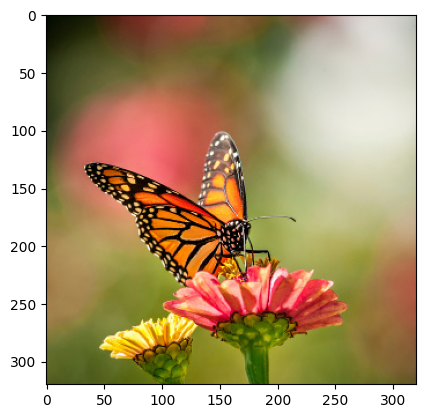

In [34]:
ex  = cv2.imread('example.jpg')
plt.imshow(cv2.cvtColor(b,cv2.COLOR_RGB2BGR))
ex_preprocessed  = cv2.cvtColor(cv2.GaussianBlur(b, (7,7), 0), cv2.COLOR_BGR2GRAY)

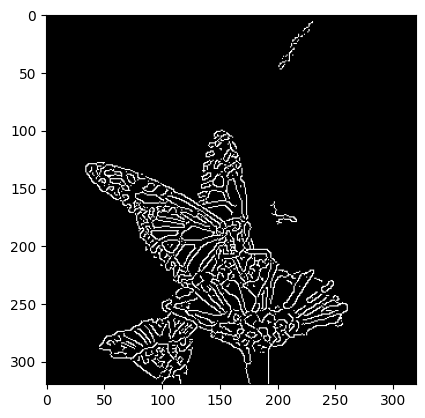

In [35]:
ex_edges = cv2.Canny(ex_preprocessed, threshold1=10, threshold2=50)
plt.imshow(cv2.cvtColor(ex_edges, cv2.COLOR_GRAY2RGB))